# ***WATER QUALITY PREDICTION USING MACHINE LEARNING***

 Water quality prediction is an essential method for the water planning,regulation and monitoring. **WATER QUALITY PREDICTION** is a necessary component of water contamination research to investigate water ecological protection. safe drinking water is essential to a healthy life. It is a fundamental human right. healthy drinking water is  a vital as a health and development issue at a national,regional and local level.


   Protecting human health - some pollutant pose risks to human health.water quality standards protect human health and avoid the costs related to medical care,productivity loss and even loss of life.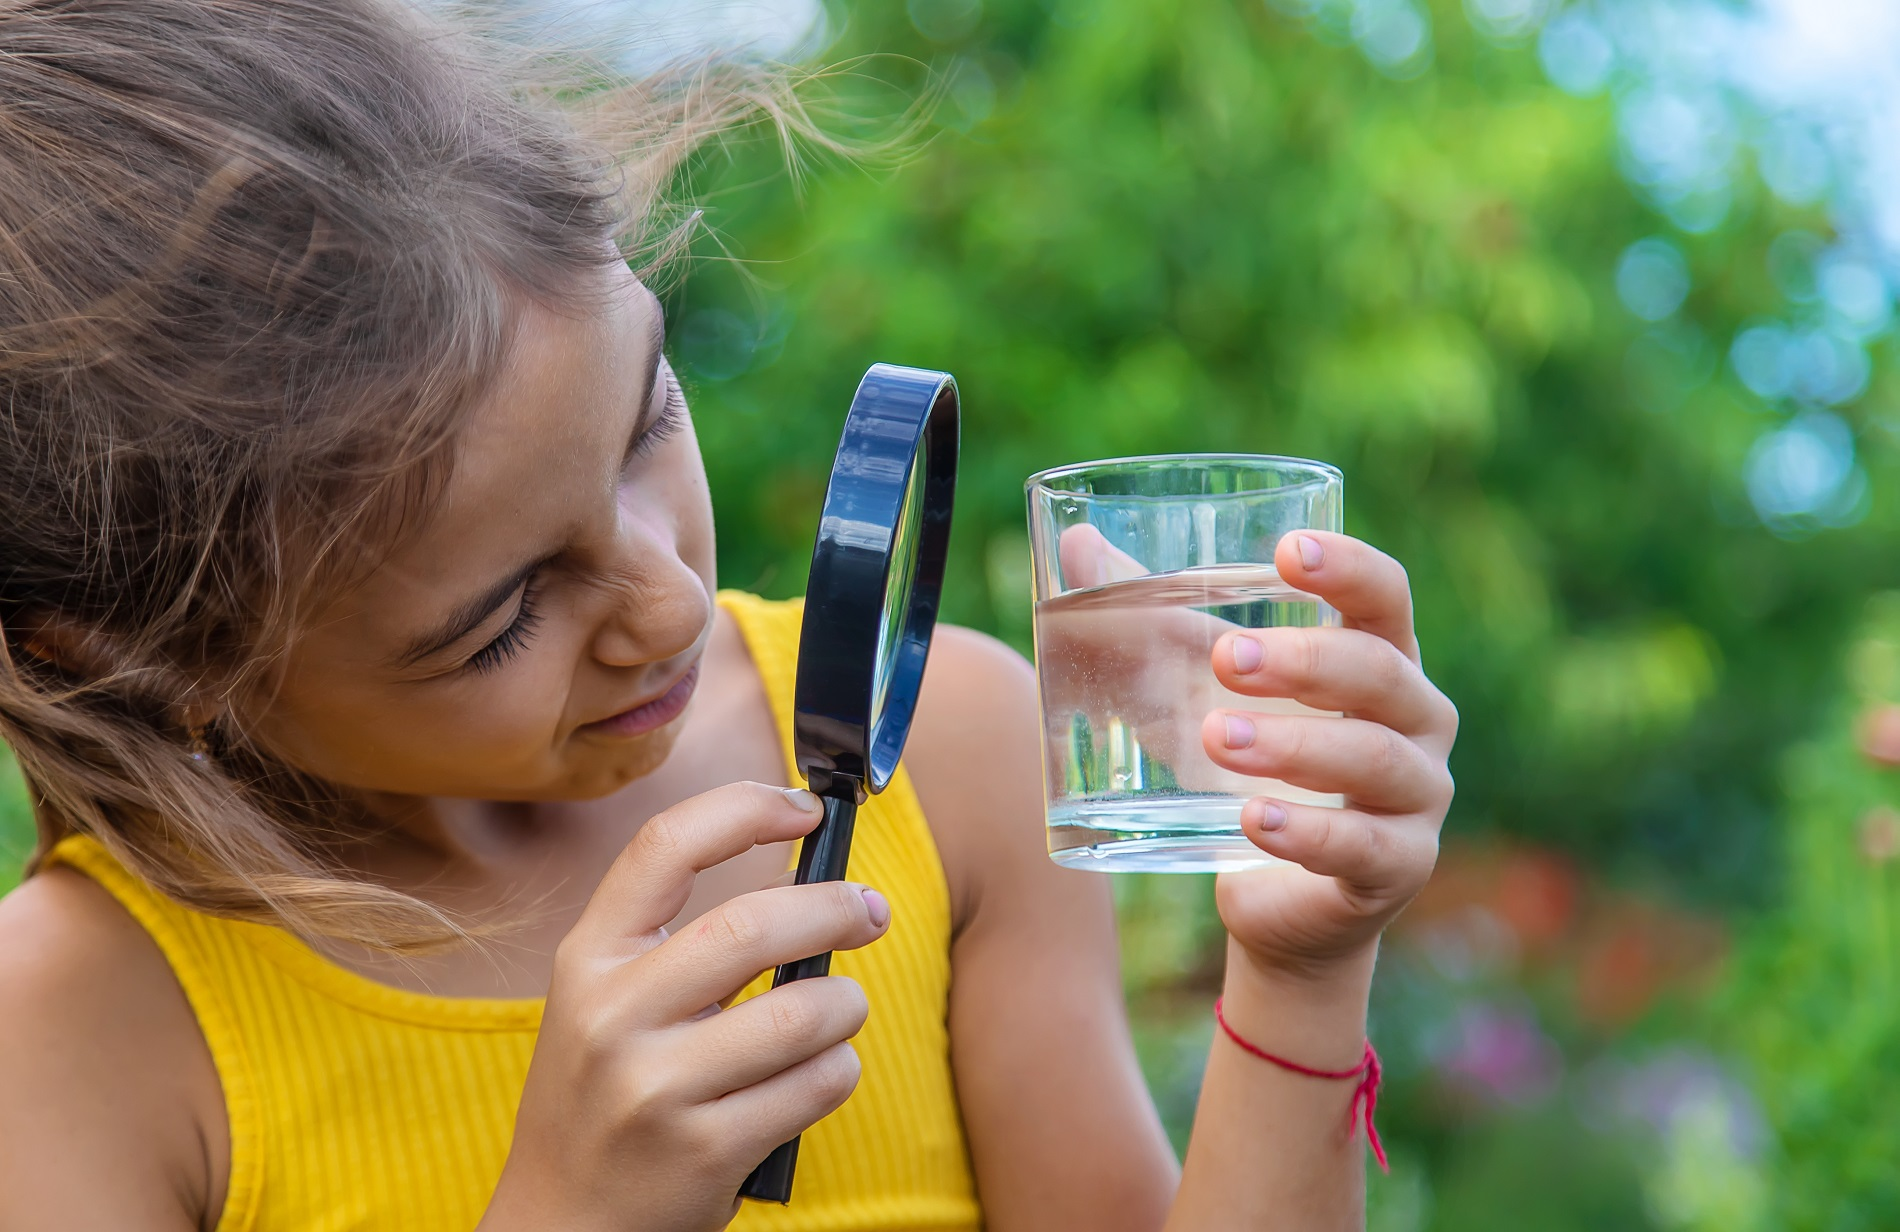

# ***Data Loading***

Importing the Library's

In [ ]:
import pandas as pd   # for reading the csv file ,used for preprocessing steps  :- remove null values etc.
import numpy as np    # numerical data, for eg.mean coef,import seaborn as sea # it is used for the making statistical graphics, explore and understand ur data.
import seaborn as sns # for making statistical graphics in python.
import matplotlib.pyplot as plt # it help in graph the data in diagram format.
import plotly.express as px


#sklearn( it deals with all the ml algorithms ,librarys, preprocessing steps)

from sklearn.preprocessing import StandardScaler   #for fitting the model

from sklearn.model_selection import train_test_split   # for giving the data for the training and testing

from sklearn.metrics import accuracy_score , classification_report,confusion_matrix





Importing the Dataset

In [ ]:
df = pd.read_csv("/content/water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


first 5 data

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.shape

(3276, 10)

checking for the,  what is the content in the columns

In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


which type of datatype in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


checking the Null values in the dataset

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

 here Seaborn library is usd for the ploting the graph of the Null values

<Axes: >

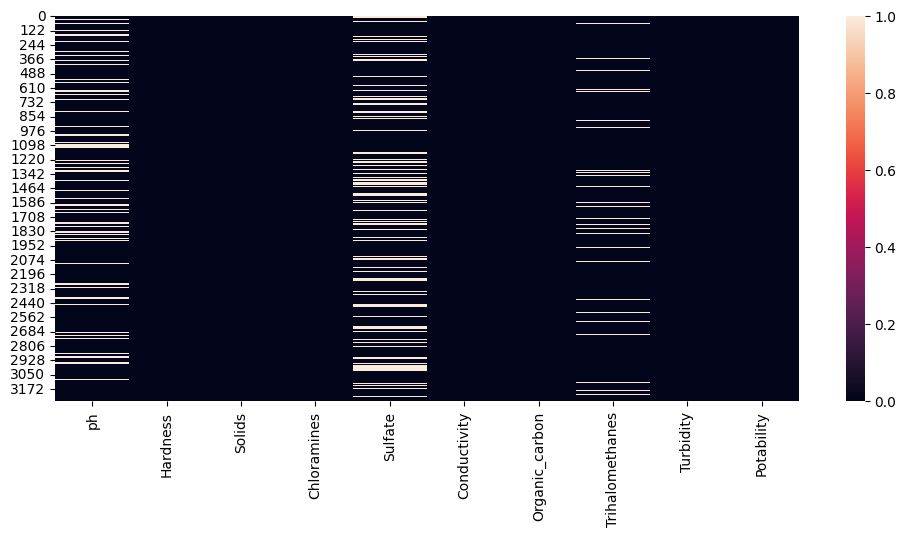

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull())


# Data Visualiztion

<Axes: >

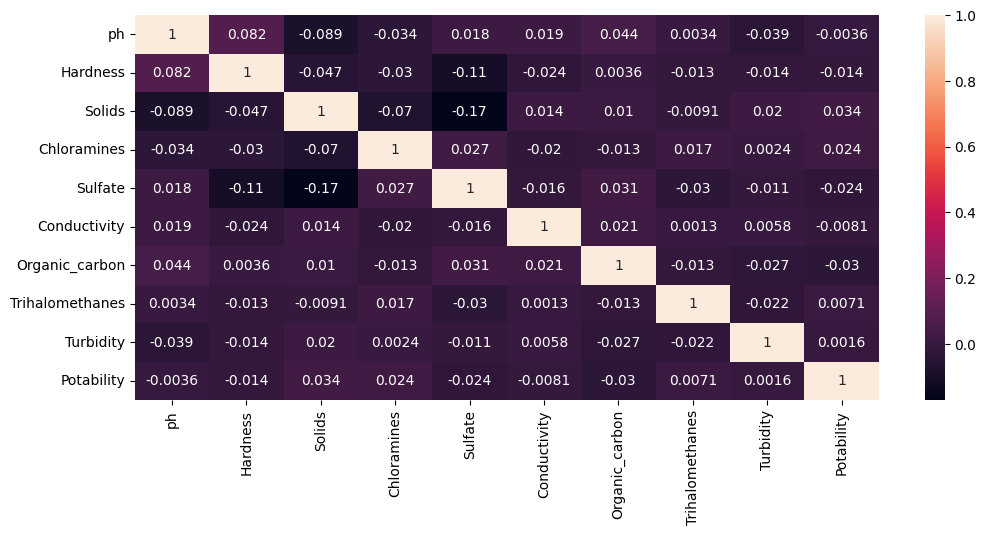

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)                      #  to plot the corelarion with the other features and
                                    #  that perticular feature has the highest corelated to the target .i.e the portability

to count the how many haves the 0 (Not safe for the drinkig the water) ,and how many have the 1(safe for the drinking the water)

<Axes: xlabel='Potability', ylabel='count'>

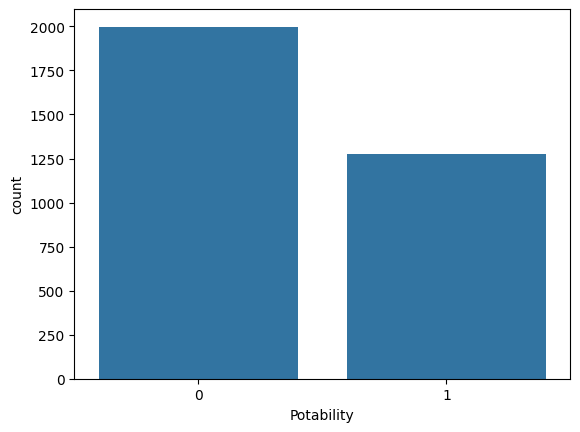

In [ ]:
sns.countplot(x="Potability",data=df)

In [ ]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

                                                                      create Pie chart

In [ ]:
fig = px.pie(df,names = "Potability",hole = 0.3, template="plotly_dark")

In [ ]:
fig.show()

for scattering the columns foe the clear view

In [ ]:
fig = px.scatter(df,x="ph",y="Hardness",color="Potability",template="plotly_dark")
fig.show()

                                            to plot the null values in the form of bar-graph



Text(0, 0.5, 'Percentage of missing values')

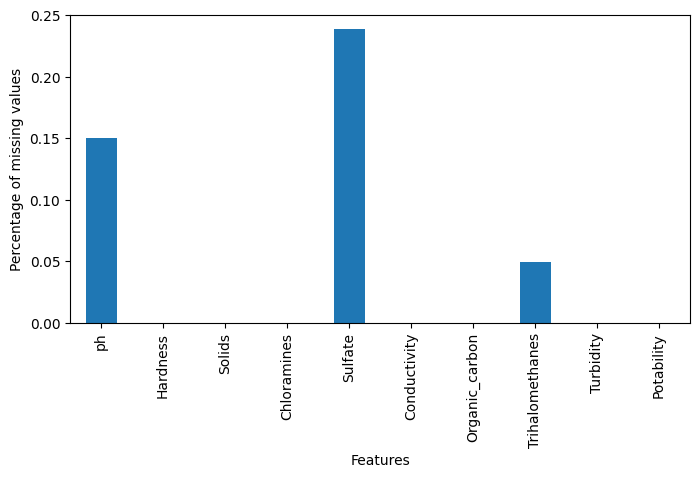

In [ ]:

df.isnull().mean().plot.bar(figsize = ( 8,4))

plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

Filling the null values with the mean  of that column
▪

In [ ]:
df["ph"] = df["ph"].fillna(df["ph"].mean())

In [ ]:
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())

In [ ]:
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [ ]:
df.isnull().sum()             ## see there is no any null value in the dataset

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

create the heatmap for checking the null values

<Axes: >

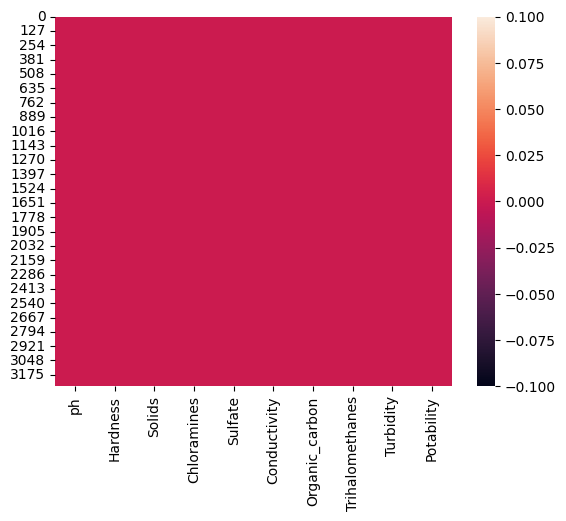

In [ ]:
sns.heatmap(df.isnull())

# Data preparation for the Training

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


to delete the unnecessary colunms from the dataset

In [ ]:
x = df.drop("Potability",axis=1)
y = df["Potability"]

In [ ]:
x.shape , y.shape     # for checking the row is deleted or not

((3276, 9), (3276,))

In [ ]:
scaler = StandardScaler()     # we have importing the library here
x = scaler.fit_transform(x)    # we calling the method here
x

array([[ 0.00000000e+00,  2.59194712e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986649e-01, ...,
         2.70597241e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116858e-01,  1.50940874e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329233e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797384e-01],
       [ 5.40150905e-01, -3.85462306e-02, -5.25811938e-01, ...,
         5.60940071e-01,  7.80223466e-01, -2.12445866e+00]])

**TRAIN AND TEST THE MODEL**

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape  , x_test.shape

((2620, 9), (656, 9))

##                                                              ***LOGISTIC REGRESSION***

In [ ]:
# apply logistic regression


from sklearn.linear_model import LogisticRegression

In [ ]:
# object of logistic regression

model_lr = LogisticRegression()

training of the model

In [ ]:
# Training Model
model_lr.fit(x_train, y_train)              ## LOGISTIC REGRESSION IS PERFECTLY FFIT

LogisticRegression()

In [ ]:
  # making the prediction

  pred_lr = model_lr.predict(x_test)    # x_test for the predicting .....## y_test is we know the output

In [ ]:
#y_test = 1, 0
pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

now we want  to  check the accuracy of the model



In [ ]:
# accuracy score

accuracy_score_lr = accuracy_score(y_test,pred_lr)

In [ ]:
print(accuracy_score_lr)

0.6173780487804879


In [ ]:
print(accuracy_score_lr*100)

61.737804878048784


# ***KNeighbours Classifier Algorithm***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# creating the object of the model

model_knn = KNeighborsClassifier()

In [ ]:
for i in range (1,8):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(x_train,y_train)
  pred_knn = model_knn.predict(x_test)
  accuracy_score_knn = accuracy_score(y_test, pred_knn)
  print(accuracy_score_knn)

0.6204268292682927
0.6371951219512195
0.6112804878048781
0.6417682926829268
0.6219512195121951
0.6737804878048781
0.6600609756097561


In [ ]:
accuracy_score_knn = accuracy_score(y_test, pred_knn)

In [ ]:
print(accuracy_score_knn*100)

66.0060975609756


***SUPPORT VECTOR MACHINE ***

In [ ]:
from sklearn.svm import SVC, LinearSVC


In [ ]:
model_svm = SVC(kernel='rbf', random_state = 42)


In [ ]:
model_svm.fit(x_train, y_train)


SVC(random_state=42)

In [ ]:
# Making Prediction
pred_svm = model_svm.predict(x_test)

In [ ]:
# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.6737804878048781


In [ ]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78       405
           1       0.69      0.26      0.38       251

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.58       656
weighted avg       0.68      0.67      0.63       656



In [ ]:
print(sv*100)

67.3780487804878


# ***BAR DIAGRAM OF ACCURACY OF THE ALGORITHMS***

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNeighbours', 'SVM'],
    'Accuracy_score' :[accuracy_score_lr, accuracy_score_knn, sv ]
})


In [ ]:
models

,Model,Accuracy_score
0,Logistic Regression,0.617378
1,KNeighbours,0.660061
2,SVM,0.673780


,Model,Accuracy_score
2,SVM,0.673780
1,KNeighbours,0.660061
0,Logistic Regression,0.617378


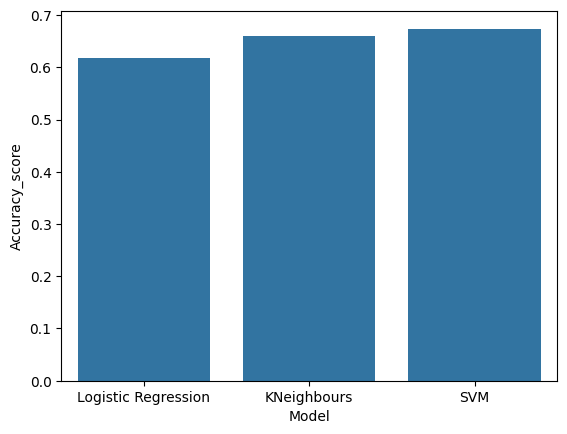

In [ ]:

sns.barplot(x='Model', y='Accuracy_score', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [ ]:
print("Enter your data := ")
ph =  float(input("ph: "))
Hardness =  float(input("Hardness: "))
Solids =  float(input("Solids: "))
phChloramines =  float(input("Chloramines: "))
Sulfate =  float(input("Sulfate: "))
Conductivity =  float(input("Conductivity: "))
Organic_carbon =  float(input("Organic_carbon: "))
Trihalomethanes =  float(input("Trihalomethanes: "))
Turbidity =  float(input("Turbidity: "))

User_data=[[ph,Hardness,Solids,phChloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity]]

Enter your data := 
ph: 20
Hardness: 344
Solids: 43
Chloramines: 7556
Sulfate: 324
Conductivity: 654
Organic_carbon: 3425
Trihalomethanes: 32
Turbidity: 1214


In [ ]:
prediction=model_svm.predict(User_data)



In [ ]:
prediction

array([1])

In [ ]:
if(prediction[0]==0):
  print("Water is not good for consuming")
else:
    print("Water is  good for consuming")

Water is  good for consuming
